In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Downloading and Loading the Dataset

In [2]:
data = pd.read_csv(r"C:\Users\ELCOT\Downloads\Mall_Customers.csv")
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

# Performing Visualizations

# Univariate Analysis

# Histplot

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

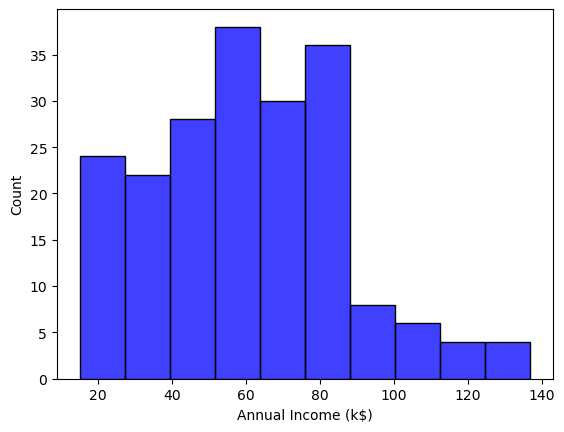

In [3]:
sns.histplot(data['Annual Income (k$)'], color="blue")

# Box Plot

<AxesSubplot:xlabel='Annual Income (k$)'>

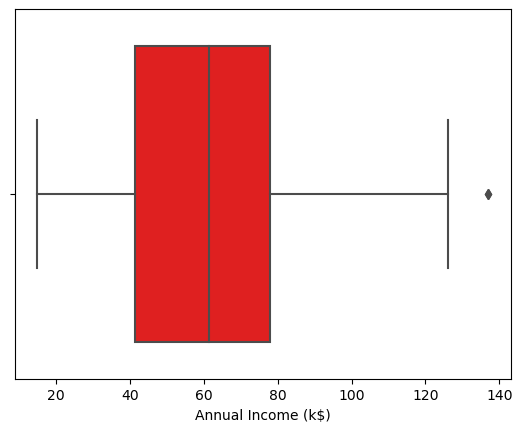

In [4]:
sns.boxplot(data['Annual Income (k$)'], color="red")

# Dist Plot

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

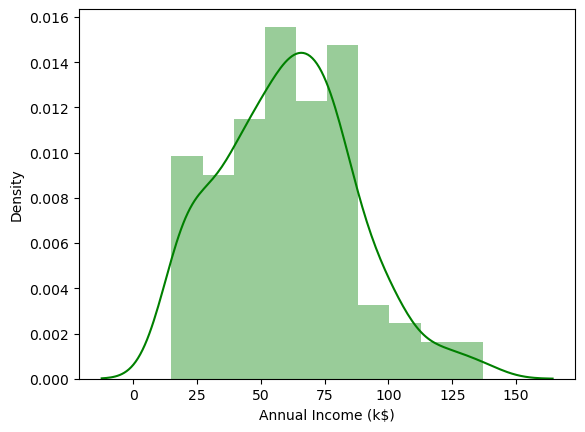

In [10]:
sns.distplot(data['Annual Income (k$)'], color="green")sns.distplot(data['Annual Income (k$)'], color="green")

# Bi-variate Analysis

# Barplot

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

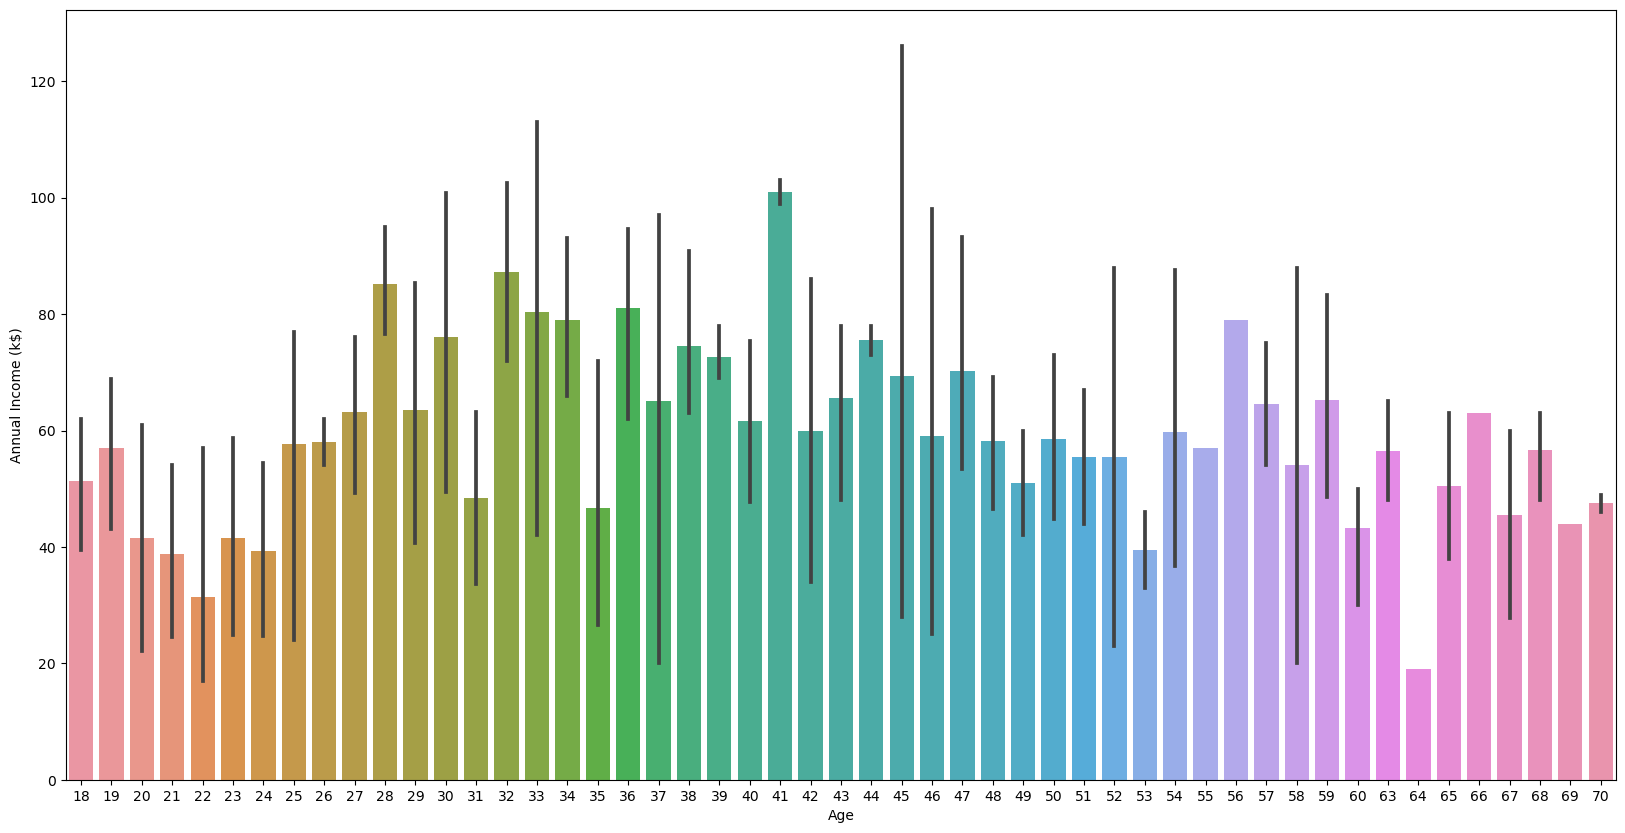

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(data['Age'],data['Annual Income (k$)'])

# Lineplot

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

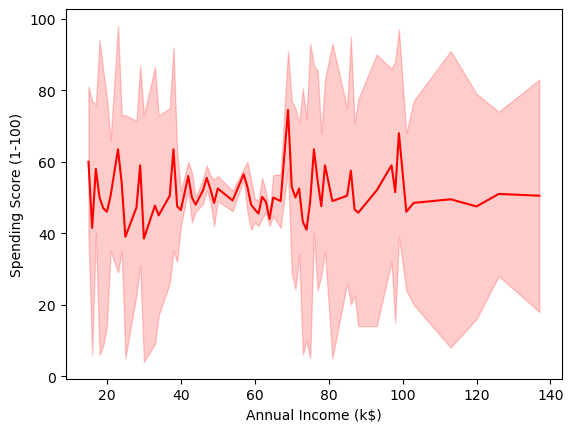

In [14]:
sns.lineplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], color="red")

# Scatter plot (Age vs Spending Score)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>

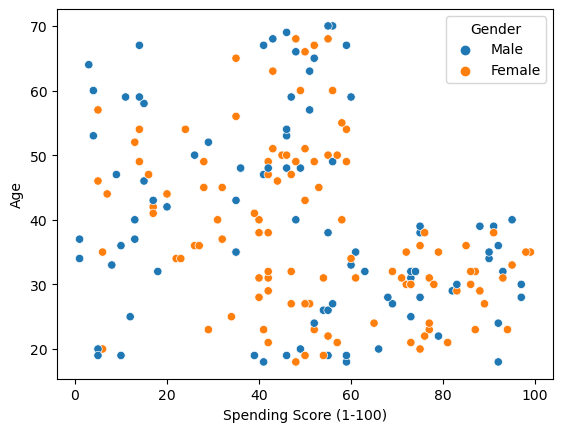

In [15]:
sns.scatterplot(data['Spending Score (1-100)'], data['Age'], hue = data['Gender'])

# Gender vs Age Distribution

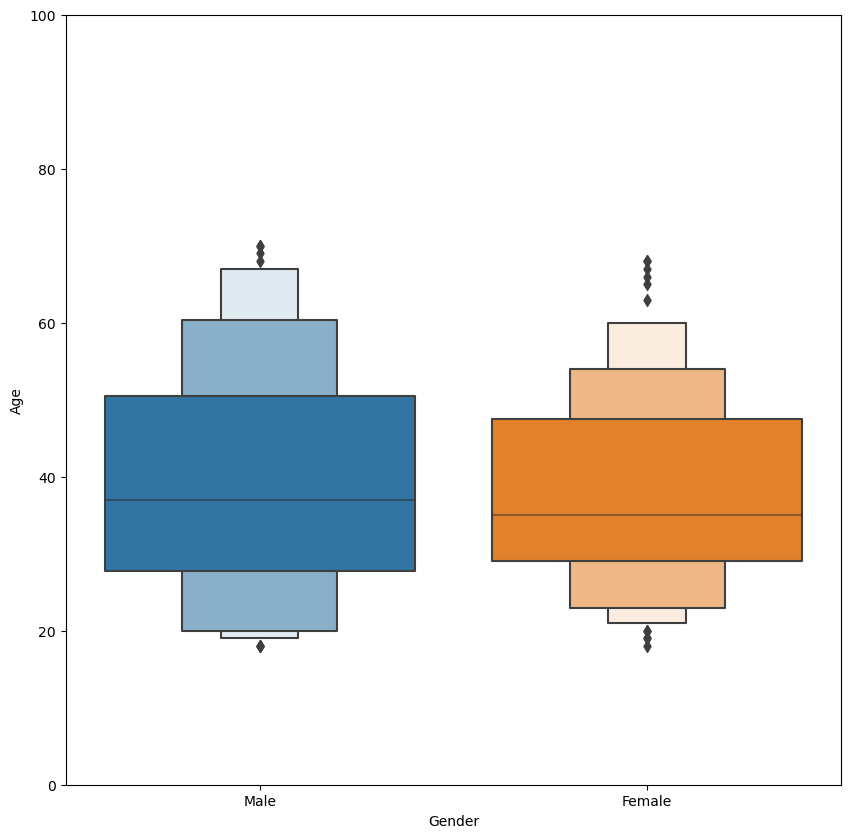

In [16]:
temp = pd.concat([data['Age'], data['Gender']], axis=1)

f, ax = plt.subplots(figsize=(10,10))
fig = sns.boxenplot(x='Gender', y="Age", data=data)
fig.axis(ymin=0, ymax=100);

#Genre -> Gender (Dataset in Kaggle had a typo)


# Annual Income vs Gender Countplot

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

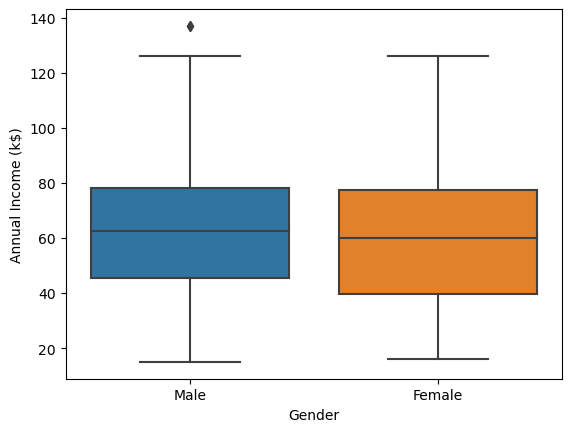

In [17]:
sns.boxplot(x=data['Gender'],y=data['Annual Income (k$)'])

# Multi-variate Analysis

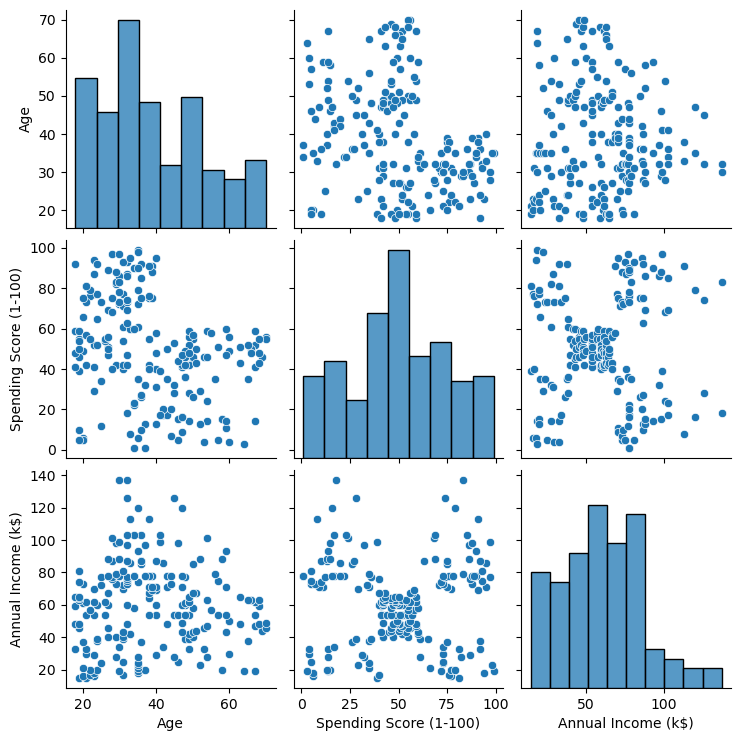

In [18]:
sns.pairplot(data=data[["Age", "Gender","Spending Score (1-100)","Annual Income (k$)"]])

# Performing Descriptive Stats on the Dataset

In [20]:
data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [21]:
data.shape

(200, 5)

In [22]:
data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

# Checking for null values

In [23]:
data.isnull().any() #Inference: The dataset has no null values

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [24]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

# Finding the outliers and replacing them

In [25]:
for i in data:
    if data[i].dtype=='int64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

# After removing outliers, boxplot will be like

{'whiskers': [<matplotlib.lines.Line2D at 0x299044bcd00>,
 'caps': [<matplotlib.lines.Line2D at 0x299044c91c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x299044bca30>],
 'medians': [<matplotlib.lines.Line2D at 0x299044c9760>],
 'fliers': [<matplotlib.lines.Line2D at 0x299044c9a30>],
 'means': []}

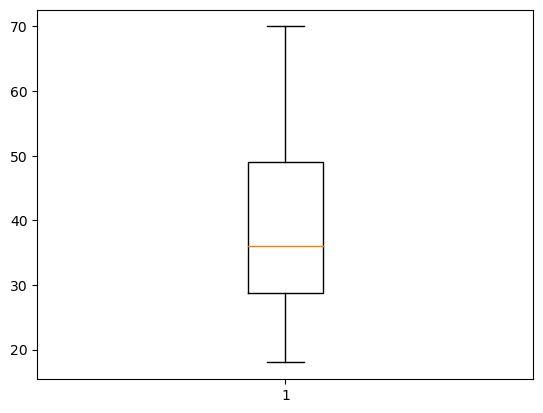

In [26]:
plt.boxplot(data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29904516c70>,
 'caps': [<matplotlib.lines.Line2D at 0x29904521250>,
 'boxes': [<matplotlib.lines.Line2D at 0x299045169a0>],
 'medians': [<matplotlib.lines.Line2D at 0x299045217f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29904521ac0>],
 'means': []}

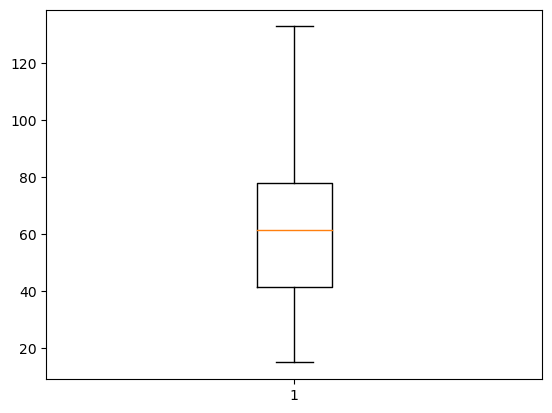

In [27]:
plt.boxplot(data['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x29904574d90>,
 'caps': [<matplotlib.lines.Line2D at 0x29904584370>,
 'boxes': [<matplotlib.lines.Line2D at 0x29904574ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x29904584910>],
 'fliers': [<matplotlib.lines.Line2D at 0x29904584be0>],
 'means': []}

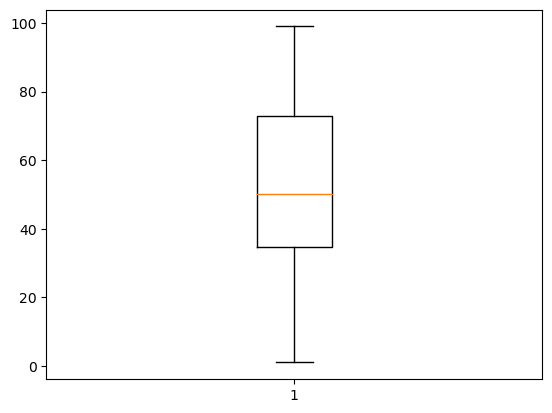

In [28]:
plt.boxplot(data['Spending Score (1-100)'])

# Checking for categorical columns and performing encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()
data['Gender'] = l_en.fit_transform(data['Gender'])
data.head()

Gender   Age  Annual Income (k$)  Spending Score (1-100)
0       1  19.0                15.0                    39.0
1       1  21.0                15.0                    81.0
2       0  20.0                16.0                     6.0
3       0  23.0                16.0                    77.0
4       0  31.0                17.0                    40.0

# Scaling the data

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

# Performing any of the clustering algorithms

In [32]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([1, 1, 2, 2, 2, 2, 4, 2, 5, 2, 5, 2, 4, 2, 1, 1, 2, 1, 5, 2, 1, 1,
       4, 1, 4, 1, 4, 1, 4, 2, 5, 2, 5, 1, 4, 2, 4, 2, 4, 2, 4, 1, 5, 2,
       4, 2, 4, 2, 2, 2, 4, 1, 2, 5, 4, 5, 4, 5, 2, 5, 5, 1, 4, 4, 5, 1,
       4, 4, 1, 2, 5, 4, 4, 4, 5, 1, 4, 1, 2, 4, 5, 1, 5, 4, 2, 5, 4, 2,
       2, 4, 4, 1, 5, 4, 2, 1, 4, 2, 5, 1, 2, 4, 5, 1, 5, 2, 4, 5, 5, 5,
       5, 2, 0, 1, 2, 2, 4, 4, 4, 4, 1, 0, 7, 3, 0, 7, 6, 3, 5, 3, 6, 3,
       0, 7, 6, 7, 0, 3, 6, 7, 0, 3, 0, 7, 6, 3, 6, 7, 0, 3, 6, 3, 0, 7,
       0, 7, 6, 7, 6, 7, 4, 7, 6, 7, 6, 7, 6, 7, 0, 3, 6, 3, 6, 3, 0, 7,
       6, 3, 6, 3, 0, 7, 6, 7, 0, 3, 0, 3, 0, 7, 0, 7, 6, 7, 0, 7, 0, 3,
       6, 3])

In [36]:
data1 = pd.DataFrame(data_scaled, columns = data.columns)
data1.head()

Gender       Age  Annual Income (k$)  Spending Score (1-100)
0     1.0  0.019231            0.000000                0.387755
1     1.0  0.057692            0.000000                0.816327
2     0.0  0.038462            0.008493                0.051020
3     0.0  0.096154            0.008493                0.775510
4     0.0  0.250000            0.016985                0.397959

In [37]:
data1['kclus']  = pd.Series(res)
data1.head()

Gender       Age  Annual Income (k$)  Spending Score (1-100)  kclus
0     1.0  0.019231            0.000000                0.387755      1
1     1.0  0.057692            0.000000                0.816327      1
2     0.0  0.038462            0.008493                0.051020      2
3     0.0  0.096154            0.008493                0.775510      2
4     0.0  0.250000            0.016985                0.397959      2

In [38]:
data1['kclus'].unique()

array([1, 2, 4, 5, 0, 7, 3, 6])

In [39]:
data1['kclus'].value_counts()

4    37
2    34
5    26
1    25
7    22
0    19
6    19
3    18
Name: kclus, dtype: int64

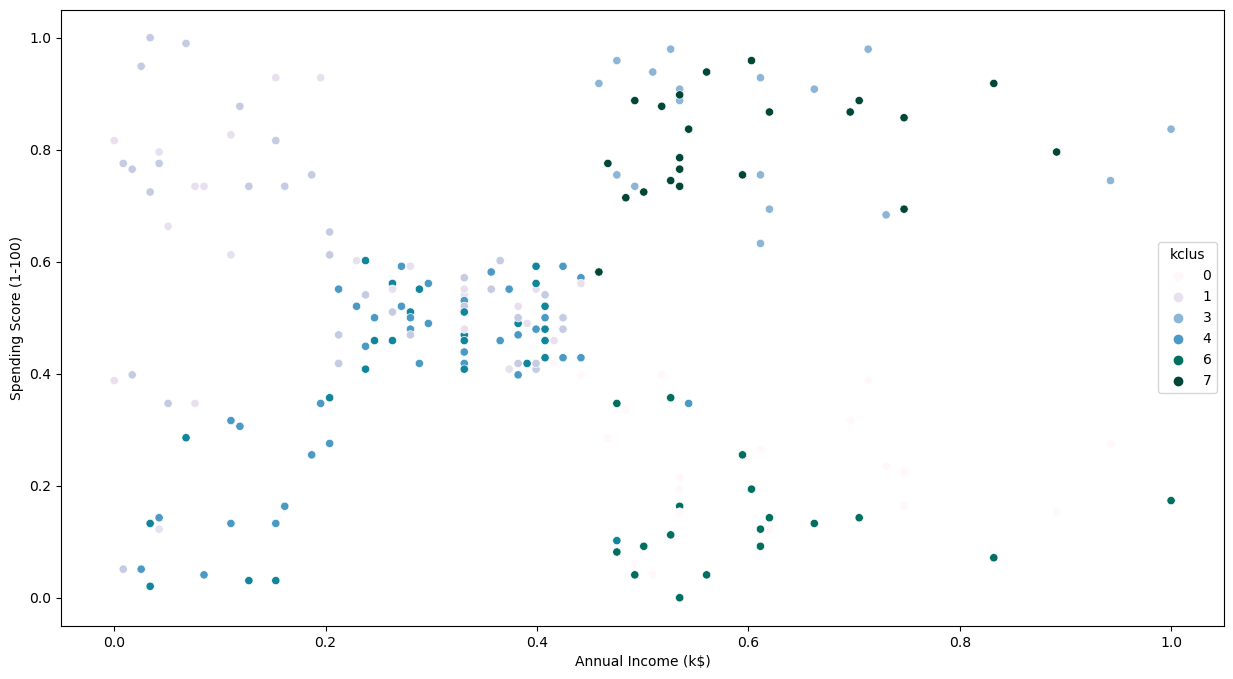

In [40]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual Income (k$)'],
                y=data1['Spending Score (1-100)'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [41]:
ind = data1.iloc[:,0:4]
ind.head()

Gender       Age  Annual Income (k$)  Spending Score (1-100)
0     1.0  0.019231            0.000000                0.387755
1     1.0  0.057692            0.000000                0.816327
2     0.0  0.038462            0.008493                0.051020
3     0.0  0.096154            0.008493                0.775510
4     0.0  0.250000            0.016985                0.397959

In [42]:
dep = data1.iloc[:,4:]
dep.head()

kclus
0      1
1      1
2      2
3      2
4      2

# Splitting dataset into train and test data

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

Gender       Age  Annual Income (k$)  Spending Score (1-100)
116     0.0  0.865385            0.424628                0.428571
67      0.0  0.961538            0.280255                0.479592
78      0.0  0.096154            0.331210                0.520408
42      1.0  0.576923            0.203822                0.357143
17      1.0  0.038462            0.050955                0.663265

In [44]:
x_test.head()

Gender       Age  Annual Income (k$)  Spending Score (1-100)
58      0.0  0.173077            0.263270                0.510204
40      0.0  0.903846            0.195329                0.346939
34      0.0  0.596154            0.152866                0.132653
102     1.0  0.942308            0.399151                0.591837
184     0.0  0.442308            0.713376                0.387755

In [45]:
y_train.head()

kclus
116      4
67       4
78       2
42       5
17       1

In [46]:
y_test.head()

kclus
58       2
40       4
34       4
102      5
184      0

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [48]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[2.44914087],
       [4.42605878],
       [2.99430095],
       [5.53285068],
       [4.27149753]])

# Measuring the performance using metrics

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score

In [51]:
mse = mean_squared_error(pred_test,y_test)
print("Mean squared error: ", mse)

Mean squared error:  3.512395793875565


In [52]:
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)

Root mean squared error:  1.8741386805344915


In [53]:
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)

Root mean squared error:  1.8741386805344915


In [54]:
acc = lr.score(x_test,y_test)
print("accuracy: ", acc)

accuracy:  0.1547710656449176
